# Homework 1

## Preamble

To run and solve this assignment, you need an interface to edit and run ipython notebooks (`.ipynb` files). The easiest way to complete this assignment is to use Google Colab. You can just copy the assignment notebook to your google drive and open it, edit it and run it on Google Colab. Most libraries you need are pre-installed on Colab.

Instructions: Click **Copy to drive** at the menu bar, and enter your solutions.

Submission: Please upload your completed **solution .ipynb file and printed PDF file** to [Brightspace](https://it.stonybrook.edu/services/brightspace) by **Feb 27th, 11:59PM EST**.

## Question 1: Linear Regression (30 points)

My friend wants to solve a linear regression problem. He asked me to help him out. He is going to give me a matrix, let's call that matrix $\mathbf{X} \in \mathbb{R}^{100 \times 4}$, which has 100 rows and 4 columns. The 100 is the number of samples, and 4 is the number of features. Let's assume that $\mathbf{x}_i \in \mathbb{R}^4$ is a feature vector of the sample $i$ and let's use $y_i \in \mathbb{R}$ as the target for the sample $i$. I am going to use $\mathbf{y} \in \mathbb{R}^{100}$ to denote the vector containing the target of all samples.

He wants to solve the following regression:

$$
\cal{L}(\mathbf{w}) = \sum_{i=1}^N { \| y_i - x_i^T \mathbf{w}  \|_2^2  }
$$

Where $N=100$ is the total number of samples and $\mathbf{w} \in \mathbb{R}^4$ is the unknown parameters of the regression and $\cal{L}(\mathbf{w})$ is the regression loss which is a function of $\mathbf{w}$.

**Q1.1 (warm-up)**: Write down the regression in a matrix format. Make sure your notation should only involve $\mathbf{y}$, $\mathbf{w}$, and $\mathbf{X}$.

**Answer:**
$$ (y-Xw)^T (y-Xw) $$

**Q1.2**: Now, take a derivative for $\mathbf{w}$ and write down how the optimal solution in the form of a system of linear equations. As a reminder, the system of the linear equation looks like $\mathbf{A} \mathbf{z} = \mathbf{b}$, where $\mathbf{A}$ and $\mathbf{b}$ are known and $\mathbf{z}$ is unknown. What are the $\mathbf{A}$ and $\mathbf{b}$ in the case of linear regression:

**Answer:** $$ L(w)=  (y-Xw)^T (y-Xw) $$

$$ d/dw L(w) = d/dw ((y-Xw)^T(y-Xw))$$

$$ X^T Xw = X^T y $$
where $$ A = X^T X; b= X^T y $$ and z being w

Before inverting the matrix, I visualized a few rows of $\mathbf{X}$ and this is the first four rows look like:

In [ ]:
import numpy as np
X = np.random.rand(100, 4)
X = X / X.sum(axis=1, keepdims=True)  # normalizing each row to sum =1
print(X[:4,:])

[[0.2787265  0.29196479 0.07266241 0.35664629]
 [0.15897098 0.23563306 0.03255064 0.57284531]
 [0.47080237 0.15429155 0.0875183  0.28738778]
 [0.11865025 0.30988368 0.26826871 0.30319735]]


I asked him how he generated the $\mathbf{X}$ matrix. He said: "I have a classifier that produces a probability of a 4-class classification problem. Each row of $\mathbf{X}$ is the output of that classifier for a sample."

**Q1.3**: Do you think I can invert the $\mathbf{A}$ matrix and give him the solution? Please justify your answer.

**Answer**:
No solution, because the structure of the classifiers output causes a rank deficiency in X, which in turn makes A non-invertible.
Since, $$ X is (100*4)$$  $$ Ais (4*4)$$
the four columns of X must be linearly dependent.

**Q1.4 (bonus)**: What is the smallest eigenvalue of the matrix $\mathbf{A}$?

**Answer**: Zero Since,eigenvalues of a positive semidefinite matrix are nonnegative $$A=X^T X $$  a 4*4 matrix




## Question 2: Logistic Regression (40 points)

In this section we will train a classifier to predict if a neonate is preterm based on volume measures of 86 brain volumes. We will code up and train a logistic regression classifier from scratch.

### Import the data
The data are in the file "data_hw1_q1.pkl", download it [here](https://drive.google.com/file/d/1xuHl8MRpNxRc5zjM5BwETrzO2N1RcZz2/view?usp=sharing). The column y indicates whether each data set was collected from a term or preterm baby (scanned at term equivalent age). The data represent mean vales of three different types of cortical imaging data: cortical thickness, cortical folding and cortical myelination, all averaged within 100 regions of interest ROIS on the surface. This gives 300 features in total.

<img src="https://raw.githubusercontent.com/charlesyou999648/MedIA/master/img/cortical_rois.png" alt="Drawing" style="width: 800px;"/>

There are 1000 babies, including 900 terms and 100 preterms. The code below loads the file and splits the data randomly into a train and test set. The data is transposed such that the rows reflect features and the columns examples (as expected from the lectures notation). A row of ones is added to each dataset to allow modelling of the bias term.

Run the code, be sure to understand what each line is doing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split


# Read the data
data = pickle.load(open('/content/drive/MyDrive/Medical Image Analysis/data_hw1_q1.pkl', 'rb'))
X, y = data['X'], data['y']

# create a test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create feature matrix
X_train = X_train.T
X_test = X_test.T

bias_row=np.ones((1,X_train.shape[1]))
print(X_train, X_test, X_train.shape,X_test.shape)

print(bias_row.shape)
X_train = np.concatenate((np.ones((1,X_train.shape[1])),X_train))
X_test = np.concatenate((np.ones((1,X_test.shape[1])),X_test))


# set variables for numbers of feature and examples to improve readabiity of code
n_features=X_train.shape[0]-1
n_examples=X_train.shape[1]

print('Dimension of X is ', X_train.shape,X.shape)
print('Dimension of y is ', y_train.shape,y.shape)

print('Number of features', n_features)
print('Number of examples', n_examples)

[[-0.51105889  0.97879333 -0.48976802 ...  0.75291609  0.30179744
  -1.34655806]
 [ 0.80110565 -0.37481065  3.48161383 ...  1.33332637 -0.9610818
   3.92679047]
 [-1.14694125 -0.91816584  0.01460454 ...  0.05068875  0.00758647
  -2.20920686]
 ...
 [-0.19632155 -0.39613437 -0.5744995  ... -1.74503015 -0.33166294
   0.40031371]
 [ 2.36585358 -1.2890315   7.24529458 ...  2.77658981 -0.01201424
  -4.7539416 ]
 [ 1.20167996  0.27137957 -2.12397658 ...  0.71497903 -0.67332788
   1.2639654 ]] [[ 1.12114157e+00  8.86493799e-01  1.45317665e+00 ... -9.26891866e-01
   4.66982731e-01  7.46206585e-01]
 [ 1.41423885e+00  4.78143635e+00 -1.42655953e+00 ... -1.25155222e+00
  -1.60231431e+00  4.73635683e+00]
 [ 3.64206483e-01  6.17871041e-01  7.91465582e-01 ...  8.53289204e-01
  -2.71168513e-03 -1.31459514e-01]
 ...
 [ 1.05894205e+00  2.75055179e-01  4.77927317e-01 ...  5.47523774e-02
  -3.48459765e-01 -1.21533341e+00]
 [-6.07894165e-01  2.39088947e+00 -1.62608227e+00 ... -2.33584439e+00
   2.11779878e

### Eyeball the data
The following code plots histograms of a single feature (brain volume) for preterms vs terms. Run the code for a few different values of 'feature'.

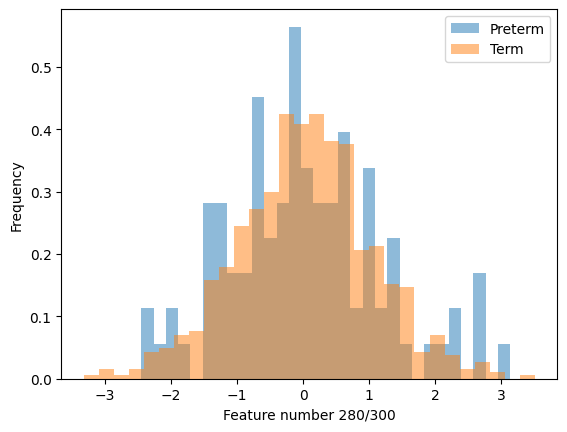

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#### STUDENT'S CODE HERE ####
# try values between 0 and 300
feature = 280

plt.hist(X_train[feature+1, y_train==0], bins=30, alpha=0.5, density=True)
plt.hist(X_train[feature+1, y_train==1], bins=30, alpha=0.5, density=True)
plt.xlabel('Feature number {}/300'.format(feature))
plt.ylabel('Frequency')
plt.legend(['Preterm','Term']);

### Model

Our predictions for a single output (ie single target) can be written:
$$ f= f(z) = \dfrac{1}{1+e^{-z}} $$

Where, for logistic regression, $f$ is the sigmoid function and:

$$z=w_0 + w_1x_1 + w_2x_2 +w_3x_3....+w_m x_m$$

Here $w_0$ is the bias term, $w_1,w_2....w_m$ are the weights;, $m$ is the number of features and $\mathbf{x}$ is a single example from our training set $X \in \mathbb{R}^{m\times n}$ (of size $ m\times n$).


### Implementation of the forward pass

We could calculate $f$ in one line of code, but it will come in handy when considering backpropagation later to consider the computation in stages, with each stage consisting of a simple module:

$$
\begin{align}
\mathbf{Z} &= \mathbf{W} \mathbf{X} \\
\mathbf{F}=f(\mathbf{Z}) &= \dfrac{1}{1+e^{-\mathbf{Z}}}
\end{align}
$$

Implemented using vectorisation.

### Task 2.1 Estimate $\mathbf{Z}$:

Write a function $z(w,x)$ that uses vectorisation to linearly transform data matrix $\mathbf{X}$ using the weights matrix $\mathbf{W}$.

**Hint** $\mathbf{X}$ has size $m_{features} \times n_{examples}$. What size should the output matrix $\mathbf{Z}$ be?


In [ ]:
def z(w,x):
    #### STUDENT'S CODE HERE ####
    Z = np.dot(w,x)      ## if w is a column vector (m*1)
    return Z

# x has (m*n), W has (1*m) ie the wights
# Z has (1*n)

Create an matrix of zeros to initialise $\mathbf{W}$. Verify your function $z(w,x)$ gives an output of the expected dimension.

- What dimension should $\mathbf{W}$ be?
- What dimension should the product $\mathbf{W}\mathbf{X}$ be?

In [ ]:
#### STUDENT'S CODE HERE ####
w = np.zeros((1, X_train.shape[0]))
print(w.shape)
output = z(w,X_train)
print(output.shape)

(1, 301)
(1, 900)


### Task 2.2 Implement Sigmoid function f:

Now write a function to compute $f(\mathbf{Z})$, our logistic regression function:

In [ ]:
def f(z):
    #### STUDENT'S CODE HERE ####
    sigmoid= 1 / (1 + np.exp(-z))
    return sigmoid

Verify your softmax looks right by running this plotting code:

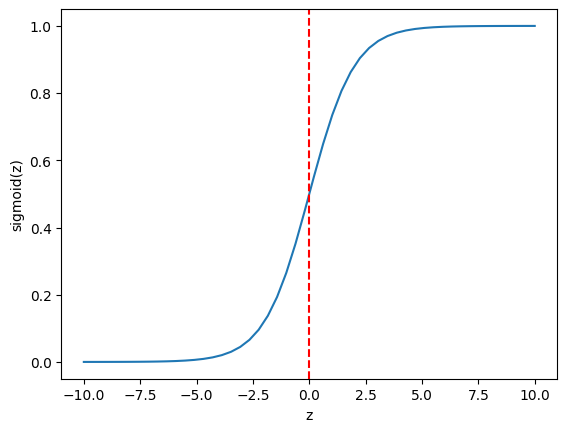

In [ ]:
inputs = np.linspace(-10,10)
outputs = f(inputs)
plt.plot(inputs, outputs)
plt.xlabel('z')
plt.ylabel('sigmoid(z)');
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

We're now in a position to compute some predictions $\mathbf{\hat{y}}$:

In [ ]:
y_pred = f(z(w,X_train))

Are these predictions any good? Let's take a look at the accuracy:

In [ ]:
def accuracy(y, y_pred, threshold = 0.5):
    y_pred_thresholded = y_pred > threshold
    correct_predictions = np.sum(y==y_pred_thresholded)
    total_predictions = np.size(y)
    accuracy = 100 * correct_predictions / total_predictions
    return accuracy

In [ ]:
y_pred = f(z(w, X_train))
print(accuracy(y_train, y_pred))

10.555555555555555


Look at the predictions ```y_pred```, what does this initial prediction return and why? Enter your answer in the box below

**Answer here**: before any training occurs, the model is completely undecided it assigned the probability of 0.5 to both classes for every sample because w is initialized to zeroes making $$ z=0 $$
when it passes the sigmoid function $$ f(0)= 0.5$$

### Task 2.3 Implement Cross Entropy Loss:

Accuracy is easy to intepret, but can't be optimised using gradient descent. We need a measure of our prediction quality that can be. A typical loss function used in  classification problems is cross-entropy:

$$L(y_i,f(z_i)) = - y_i \ln(f(z_i)) - (1-y_i) \ln(1-f(z_i))$$

This may be implemented using vectorisation as:

$$L(\mathbf{Y},\mathbf{F}) = - \mathbf{Y} \ln(\mathbf{F}) - (1-\mathbf{Y}) \ln(1-\mathbf{F})$$

This returns a vector of losses $(L_1,L_2....L_n)$ estimated for all training examples n. We require the total cost estimated as:

$$ J(\mathbf{W})= \frac{1}{n} \sum_i L_i(y_i,f(z_i)) $$

Implement the Cross-Entropy loss and return the total cost (**hint** using numpy functions for vectorisation).

In [ ]:
def loss(y, y_pred):
    epsilon = 1e-5
    # note the negative sign so that the loss decreases as our predictions get better
    # add a small penaty term to prevent calculation of log(0)
    #### STUDENT'S CODE HERE ####
    L = -y * np.log(y_pred + epsilon) - (1 - y) * np.log(1 - y_pred + epsilon)
    ## loss = np.mean(L)
    return np.mean(L)

In [ ]:
total_loss= loss(y_train,y_pred)
print(total_loss)

0.6931271807599427


### Task 2.4 Implement Forward Pass


We now have all the components of the forward pass for our logistic regression. Write a full forward pass that takes data, targets and a weight matrix and performs the forward pass to calculate the loss:

**hint - One line** You have already defined all the vectorised functions you need above

In [ ]:
def forward_pass(X, y, w):
    #### STUDENT'S CODE HERE ####
    F = f(z(w,X))
    #F = 1 / (1 + np.exp(-w.dot(X)))
    print('Loss: {}'.format(loss(y,F)))
    print('Accuracy: {}'.format(accuracy(y,F)))
    return F

In [ ]:
#perform forward pass
forward_pass(X_train,y_train, w)

Loss: 0.6931271807599427
Accuracy: 10.555555555555555


array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

### Task 2.5 Implement backwards pass

We're now ready to try and adjust our parameters $\mathbf{W}$ in order to optimise our predictions. First, calculate the change in our loss function with respect to our parameters, $\dfrac{\partial L}{\partial \mathbf{W}}$.


**Answer here**:
$$ (f(z_i)-y_i)x_i $$

this can be writtened as vectorized form as
$$ 1/n X(F-y)^T $$

Let's calculate the gradient of our loss, $\dfrac{\partial L}{\partial \mathbf{W}}$, for a **single** input, $\mathbf{x}$. Fill in the calculations of the backward pass in the following code:

In [ ]:
#### STUDENT CODE HERE ####
w= np.zeros((1, X_train.shape[0]))

# select just the first example here
x = X_train[:, 0].reshape(-1,1)
y_single = y_train[0]
print('The true value of y is: {}'.format(y_single))

# calculate the forward pass, and store the outputs at each stage
Z = z(w, x)
F = f(Z)
print('Our prediction for y is: {}'.format(F))

# estimate the loss
l = loss(y_single, F)
print('The loss is {}'.format(l))

# now implement the backwards pass here,
#implementing using the equations above:
dl_dw =(F - y_single) * x
print('Gradient of loss w.r.t weights:', dl_dw.shape)

The true value of y is: 0
Our prediction for y is: [[0.5]]
The loss is 0.6931271807599427
Gradient of loss w.r.t weights: (301, 1)


We can check this gradient calculation is correct by updating our weights vector and looking at our new prediction:

In [ ]:
# The gradient is in the direction of increasing loss,
# so we subtract the gradient from w.
learning_rate = 0.001
w = w - learning_rate * dl_dw
Z = z(w,x)
F = f(Z)
l = loss(y_single,F)
print('Our updated prediction for y is: {}'.format(F))
print('The loss is {}'.format(l))

Our updated prediction for y is: [[0.4973072 ]
 [0.50137619]
 [0.49784277]
 [0.50308848]
 [0.49849343]
 [0.49864453]
 [0.50371144]
 [0.49697217]
 [0.50018331]
 [0.50143817]
 [0.50222077]
 [0.50035329]
 [0.50033602]
 [0.49803471]
 [0.50006425]
 [0.4973757 ]
 [0.49951023]
 [0.50074941]
 [0.49582142]
 [0.49767229]
 [0.50224389]
 [0.49747143]
 [0.50305412]
 [0.4983162 ]
 [0.50099064]
 [0.4996014 ]
 [0.49518776]
 [0.50118119]
 [0.50529742]
 [0.50403943]
 [0.50400475]
 [0.49848306]
 [0.50306353]
 [0.50266552]
 [0.50005133]
 [0.49872399]
 [0.49479325]
 [0.49714851]
 [0.49963069]
 [0.50444569]
 [0.50046911]
 [0.49594301]
 [0.49580744]
 [0.50013259]
 [0.50429661]
 [0.4986343 ]
 [0.50637367]
 [0.49981026]
 [0.49810208]
 [0.51142907]
 [0.49945911]
 [0.50175964]
 [0.50246834]
 [0.49957601]
 [0.49916536]
 [0.50036901]
 [0.4987581 ]
 [0.50180663]
 [0.50417462]
 [0.49571127]
 [0.50410479]
 [0.49936182]
 [0.49925224]
 [0.49948283]
 [0.49602537]
 [0.4986279 ]
 [0.49583669]
 [0.50071946]
 [0.49364832]
 

Looks good! We have only updated $\mathbf{w}$ using information from a single data point. In practice we want to use all the data available.

**To do**
1. Perform the backward pass again, but this time with vectorisation. Check that the shape of `dL_dw` is what you would expect.
2. Estimate the full cost over all training examples

In [ ]:
w = np.zeros((1,X_train.shape[0]))

# calculate the forward pass, and store the outputs at each stage
Z = z(w,X_train)
F = f(Z)
l = loss(y_train, F)

n = X_train.shape[1]
# To do - implement the backward pass
dL_dw = (1 / n) * np.dot((F - y_train), X_train.T)

print('dL_dw has shape: {}'.format(dL_dw.shape))

grad_mean = np.mean(np.abs(dL_dw))
print('Mean gradient: {}'.format(grad_mean))

dL_dw has shape: (1, 301)
Mean gradient: 0.02687513805173451


###  Putting it all together: the training loop

We now have everything we need to train a logistic regression classifier using backprop. Fill out the training loop below using the code you have already written in this notebook.

In [ ]:
# initialise w to all zeros
w = np.zeros((1, X_train.shape[0]))

epsilon = 1e-5
# mean centre and normalise X
X_centred = np.ones_like(X_train)
X_centred[1:] = (X_train[1:] -X_train[1:].mean(axis=1,keepdims=True)) / (X_train[1:].std(axis=1,keepdims=True)+epsilon)

# we'll store the loss and accuracy in these lists during training
loss_record = []
accuracy_record = []

num_iterations = 2000
learning_rate = 0.001

for i in range(num_iterations):
    # forward pass - get predictions
    #### STUDENT CODE HERE####
    Z = z(w,X_centred)
    F = f(Z)

    # store the loss/ accuracy at this iteration
    loss_value= loss(y_train,F)
    accuracy_value=  accuracy(y_train,F)
    loss_record.append(loss_value)
    accuracy_record.append(accuracy_value)

    #backwards pass to get gradients
    #### STUDENT CODE HERE ####
    # answer:
    n = X_centred.shape[1]
    dL_dw = (1 / n) * np.dot((F - y_train), X_centred.T)

    grad_mean = np.mean(np.abs(dL_dw))

    # update the weights
    #### STUDENT CODE HERE ####
    w= w - learning_rate * dL_dw

Max training acc: 92.66666666666667


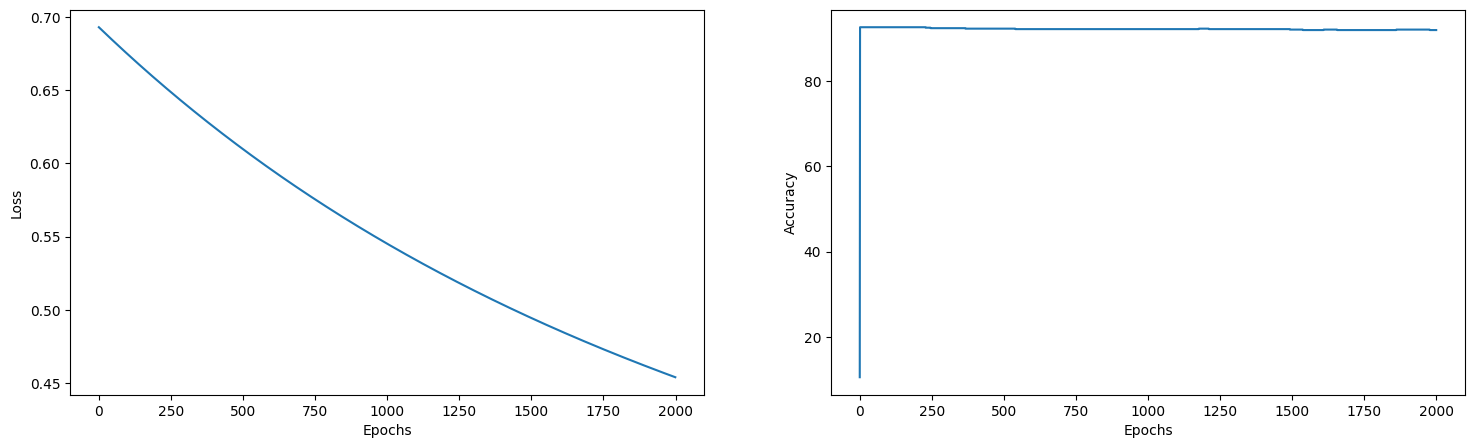

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (18,5))
ax[0].plot(loss_record)
ax[1].plot(accuracy_record)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy');

print('Max training acc:', np.max(accuracy_record))

###  Now Testing on left out set

**Task:** test the performance of your logistic regression on your left out test set

In [ ]:
# centre X
X_test_centred = np.ones_like(X_test)
X_test_centred[1:] = (X_test[1:] -X_test[1:].mean(axis=1,keepdims=True)) / (X_test[1:].std(axis=1,keepdims=True)+epsilon)

Z_test = z(w,X_test_centred)
F_test = f(Z_test)
l = loss(y_test,F_test)

print('loss:', l)
print('final acc:',accuracy(y_test,F_test))

loss: 0.4851104333125065
final acc: 90.0


###  Task 2.7 (bonus) Evaluation with more metrics
Sometimes accuracy alone cannot give a holistic view of perfomance, especially when the classes are imbalanced. In this case, we can use some other metrics, including AUROC, average precision, F1 score to measure the performance.

#### Plot AUROC curve
In this task, you are requested to plot the AUROC (area under the receiver operating characteristic) curve. Some explanation about AUROC can be found [here](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc).

In [ ]:
def calculate_auroc(actual, predicted):
    # Sort the predictions in descending order
    sorted_indices = np.argsort(predicted)[::-1]
    actual_sorted = actual[sorted_indices]

    # Count the positive and negative examples
    num_positives = np.sum(actual == 1)
    num_negatives = np.sum(actual == 0)

    # Initialize variables
    true_positives = 0
    false_positives = 0
    tpr_list = [0]
    fpr_list = [0]

    # Iterate through the sorted predictions
    for i in range(len(sorted_indices)):
        if actual_sorted[i] == 1:
            true_positives += 1
        else:
            false_positives += 1

        # Calculate True Positive Rate (Sensitivity) and False Positive Rate
        tpr = true_positives / num_positives
        fpr = false_positives / num_negatives

        # Append values to lists for plotting
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    # Calculate AUROC
    #### STUDENT CODE HERE ####
    auroc = np.trapz(tpr_list, fpr_list)

    return auroc, tpr_list, fpr_list

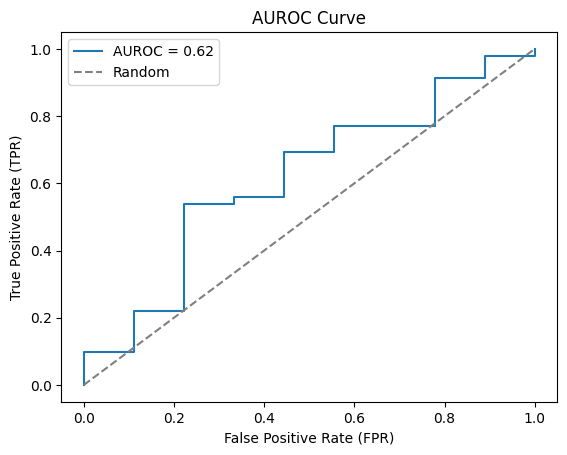

In [ ]:
auroc, tpr_list, fpr_list = calculate_auroc(y_test, F_test.reshape(-1,))

# Plot the AUROC curve
plt.plot(fpr_list, tpr_list, label=f'AUROC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUROC Curve')
plt.legend()
plt.show()

Does the accuracy and AUROC look good? Discuss the results below.

**Answer:**

The AUROC value in the plot is 0.62, which is slightly better than random guessing (AUROC = 0.5), but still quite low

## Question 3: Fix the Metadata of a Medical Image (NIFTI File) (30 points)

###  Task 3.1 Use ITK-SNAP to adjust the metadata

**Backgound:** During the data pre-processing, such as format conversion of medical image, the metadata (header) of the image could be missing or corrupted. In this case, we need to fix the header of the image to view it correctly.

**Task:** Download the test image [here](https://drive.google.com/file/d/191BBBVaJBJZlisLieomF5mI3td2xDWSy/view?usp=sharing) and mask [here](https://drive.google.com/file/d/1pHrdFp8z5Ej4MDR7iSGMBE0jWQVbeCHW/view?usp=sharing).

1. Use ITK-SNAP to overlay the segmention mask on top of the image. Next,
use ITK-SNAP to adjust the metadata of the image to **correct the orientation**.

2. Attach a screenshot of orientation-corrected display on ITK-SNAP below.

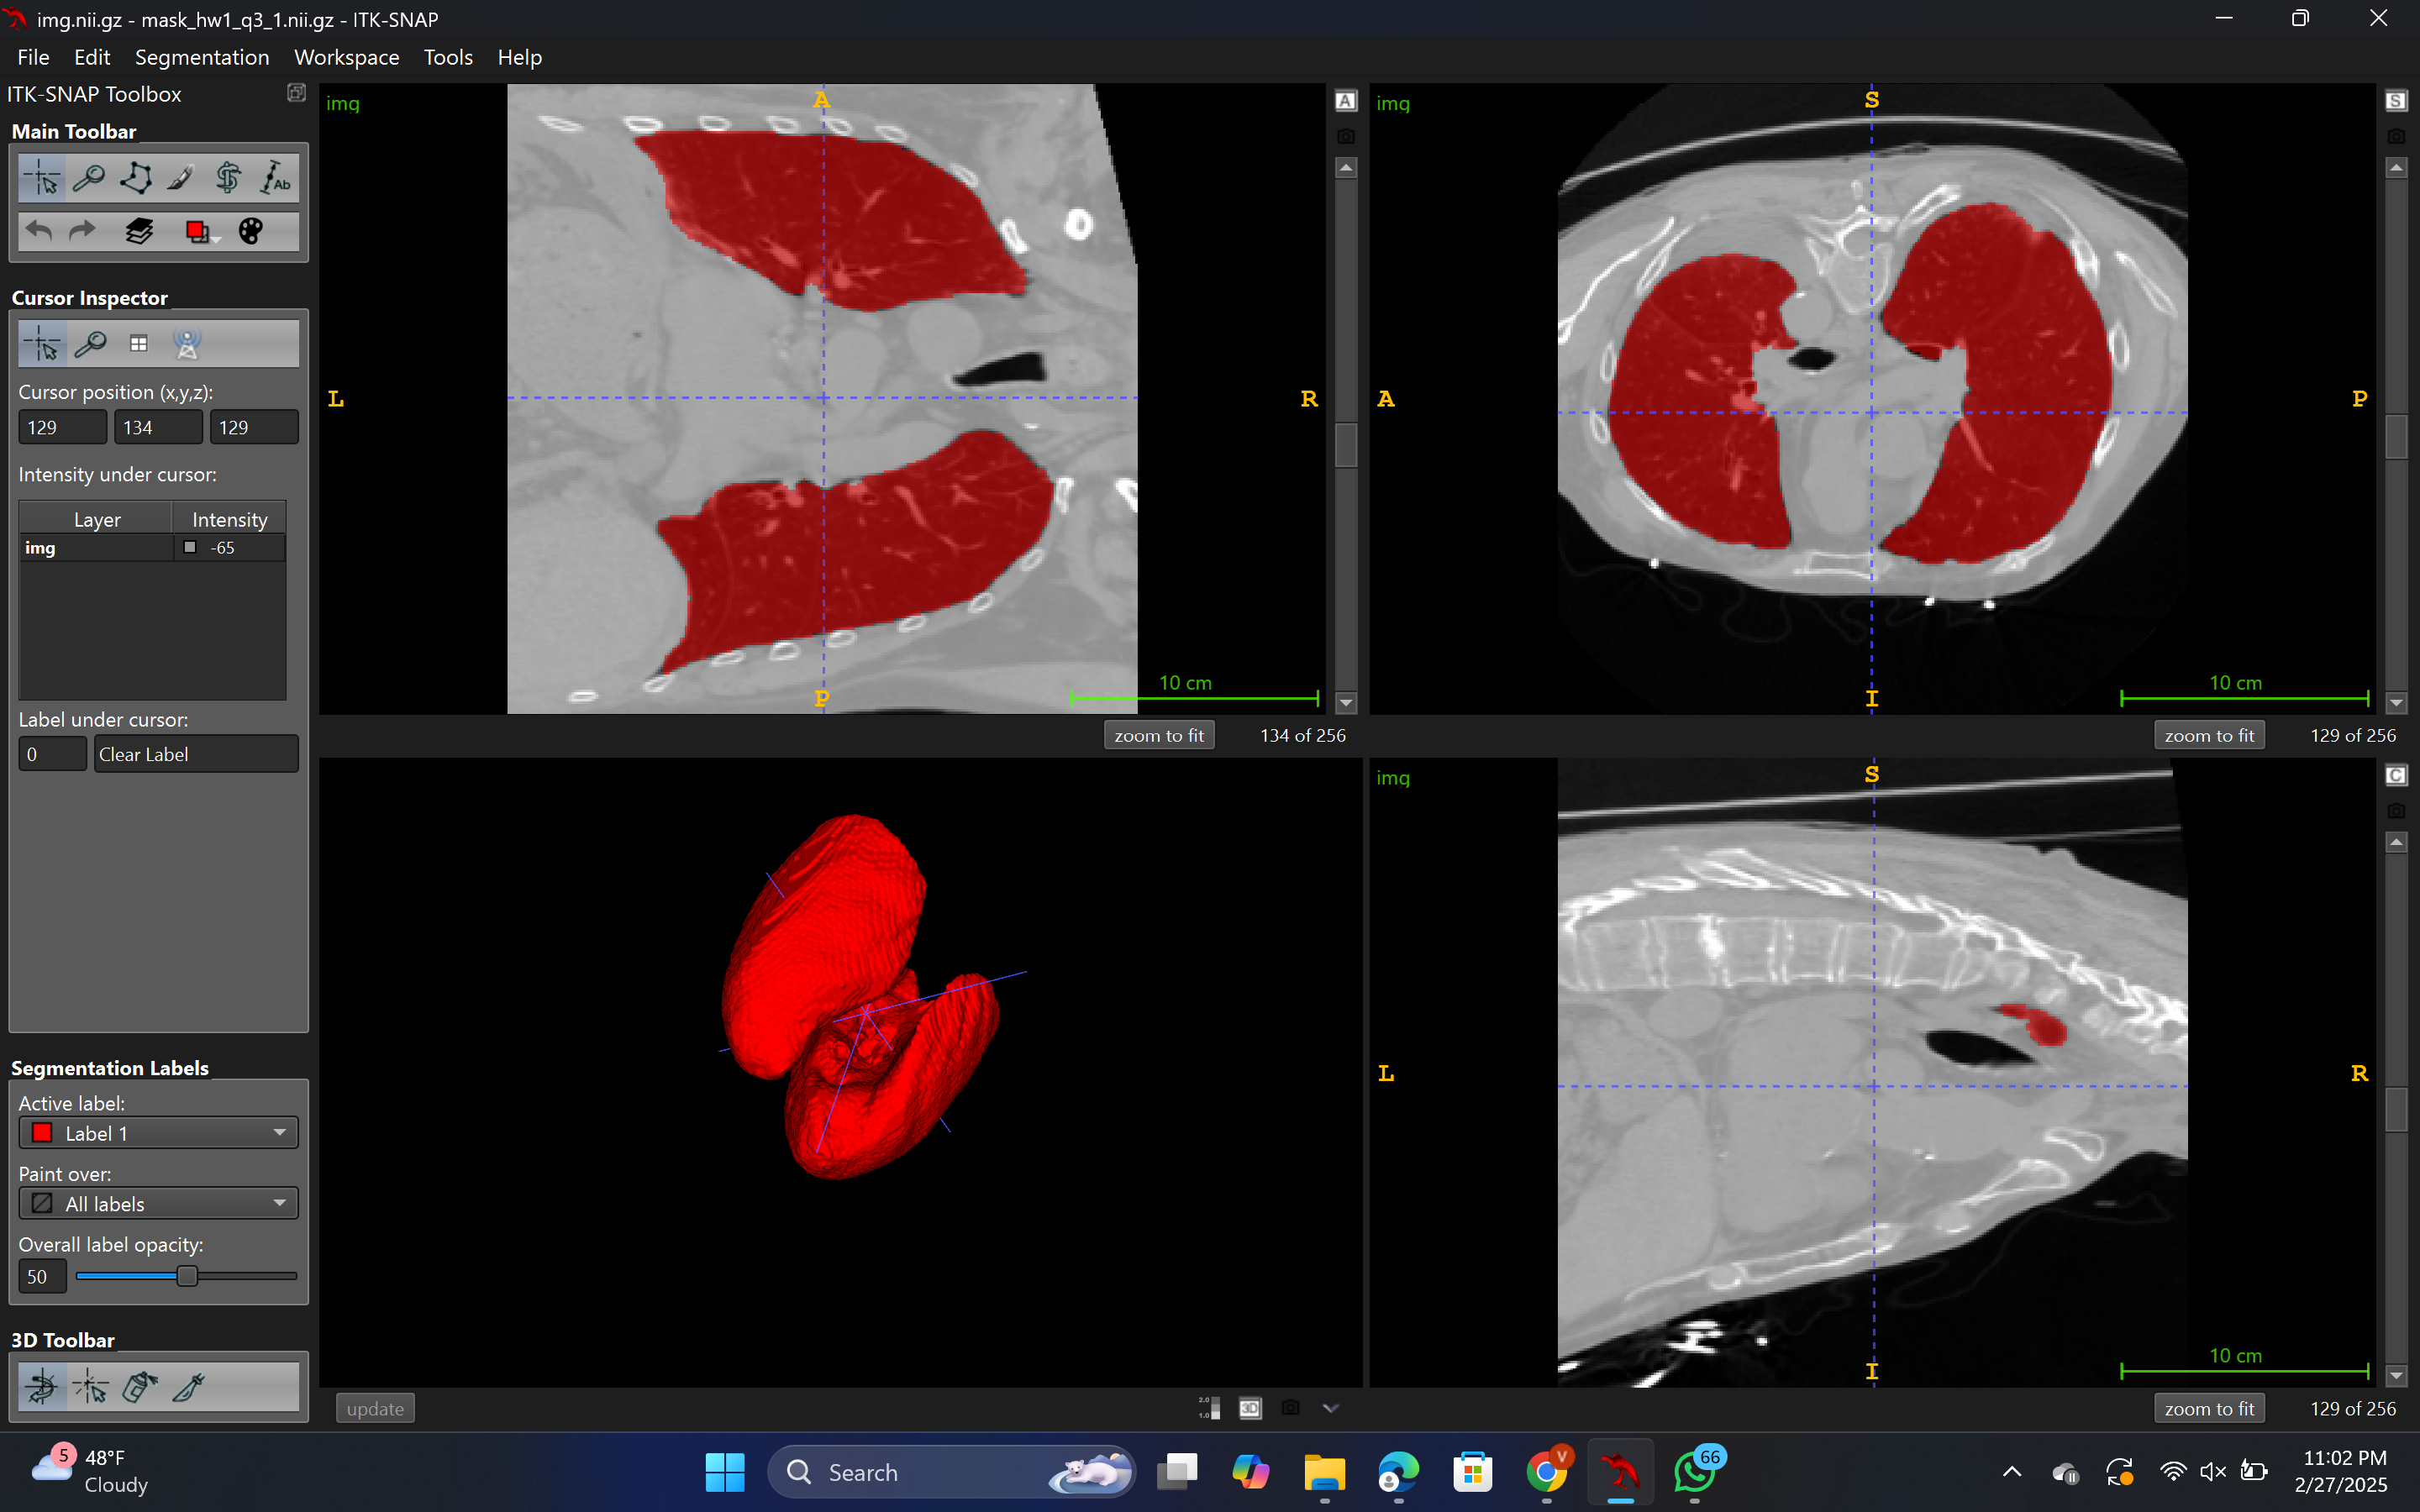

###  Task 3.2 Use SimpleITK to adjust the metadata

**Backgound:** While ITK-SNAP is useful for manually adjust the metadata. Sometimes we need to adjust large amount of images, so we want to use SimpleITK to automate the process.

**Task:** Download the test image [here](https://drive.google.com/file/d/1E7ajhI-xGoQcv698tLmpQyavNCF48WsA/view?usp=sharing). Use SimpleITK to adjust the metadata of the image to **correct the orientation**, and **set the spacing to 1mm isotropic**. Please don't flip/transpose the image array itself.

**Hint:** Read the material [here](https://simpleitk.readthedocs.io/en/release/fundamentalConcepts.html).

In [ ]:
# install required package
!pip install simpleitk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 11.5 MB/s eta 0:00:00


In [ ]:
import SimpleITK as sitk

In [31]:
img = sitk.ReadImage('/content/drive/MyDrive/Medical Image Analysis/img_hw1_q3_2.nii.gz')

In [34]:
#### STUDENT CODE HERE ####
# set spacing to 1mm isotropic
new_spacing = (1.0, 1.0, 1.0)

# Get original metadata
original_origin = img.GetOrigin()
original_direction = img.GetDirection()

img.SetSpacing(new_spacing)
img.SetOrigin(original_origin)
img.SetDirection(original_direction)

In [ ]:
print(original_origin)
print(original_direction)
print(img.GetSpacing())
print(img.GetSize())
print(img.GetDirection())

(0.0, 0.0, 0.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 1.0, 1.0)
(256, 256, 256)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [41]:
sitk.WriteImage(img, 'img_hw1_q3_2_restored.nii.gz')